In [1]:
##### %matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
CityRide_df = pd.merge(ride_df, city_df, on='city', how='outer')
# Display the data table for preview
CityRide_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
gp_type_city = CityRide_df.groupby(['type', 'city'],as_index=False) #grouped by Type & City
ridecount = pd.DataFrame(gp_type_city.count()) #Count applied to grouped data
avgfare = pd.DataFrame(gp_type_city.mean()) #mean applied to grouped data

bubbletable = pd.merge(ridecount, avgfare, on='city', how='outer') #merge ridecount and avg fare tables

bubbletable = bubbletable[['type_x', 'city', 'ride_id_x', 'fare_y', 'driver_count_y']] #remove extra columns
bubbletable = bubbletable.rename(columns={'type_x':'Type',\
                                         'city':'City',\
                                         'driver_count_y':'Drivers in City',\
                                         'ride_id_x':'Total Rides',\
                                          'fare_y':'Average Fare'}) #rename columns

bubbletable['Drivers in City'] = bubbletable['Drivers in City'].astype(int) #convert Drivers columns to int
bubbletable['Average Fare']= bubbletable['Average Fare'].round(2)    #round avg fare to 2 decimal places                                     

#scatter tables per Type (Urban, Rural, Suburban)
rural = bubbletable.loc[bubbletable["Type"] == "Rural", :]
urban = bubbletable.loc[bubbletable["Type"] == "Urban", :]
suburban = bubbletable.loc[bubbletable["Type"] == "Suburban", :]


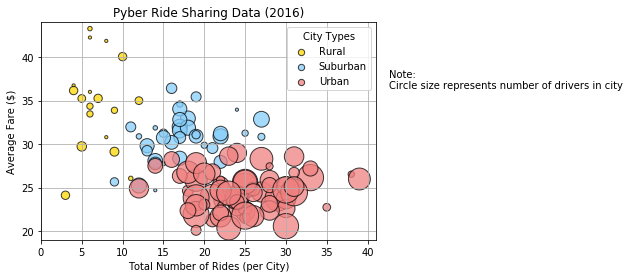

In [3]:
##### Build the scatter plots for each city types
#RURAL
plt.scatter(rural['Total Rides'], rural['Average Fare'], marker="o", facecolors="gold",\
            edgecolors="black", s=rural['Drivers in City']*10, alpha=0.75, label='Rural')
#SUBURBAN=
plt.scatter(suburban['Total Rides'], suburban['Average Fare'], marker="o", facecolors="lightskyblue",\
            edgecolors="black", s=suburban['Drivers in City']*10, alpha=0.75, label='Suburban')
#URBAN  
plt.scatter(urban['Total Rides'], urban['Average Fare'], marker="o", facecolors="lightcoral",\
            edgecolors="black", s=urban['Drivers in City']*10, alpha=0.75, label='Urban')

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.xlim(0, 41)
plt.ylim(19, 44)

# Create a legend w/ title
lgnd = plt.legend(loc='upper right', title = "City Types")
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

#plt.description('Figure 1.1 is designed for me to learn basics of Pylab')
textstr = 'Note: \nCircle size represents number of drivers in city'
plt.figtext(0.93, 0.65, textstr, fontsize=10)

# Save Figure
plt.savefig("../Images/myPyberBubble.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

In [5]:
CityRide_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [6]:
#Calculate Type-Fare Sums
gp_type = CityRide_df.groupby('type').sum() #grouped by Type

# Assign Type sums
rural_perc = gp_type.loc['Rural', 'fare']
suburban_perc = gp_type.loc['Suburban', 'fare']
urban_perc = gp_type.loc['Urban', 'fare']

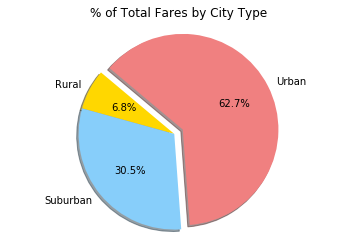

In [15]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural_perc, suburban_perc, urban_perc]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, labels=labels, explode= explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/myPyberFares.png")

In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

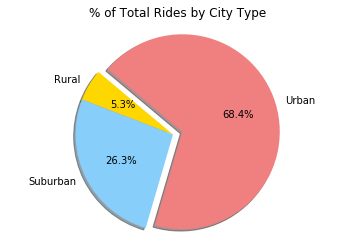

In [9]:
# Calculate Ride Percents
gp_type_rides = CityRide_df.groupby('type').count() #grouped by Type

# Assign Type sums
rural_rides = gp_type_rides.loc['Rural', 'ride_id']
suburban_rides = gp_type_rides.loc['Suburban', 'ride_id']
urban_rides = gp_type_rides.loc['Urban', 'ride_id']

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural_rides, suburban_rides, urban_rides]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, labels=labels, explode= explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("../Images/myPyberRides.png")

In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [11]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [12]:
# Calculate Driver Percents
gp_type_drivers = city_df.groupby('type').sum() #grouped by Type
gp_type_drivers

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


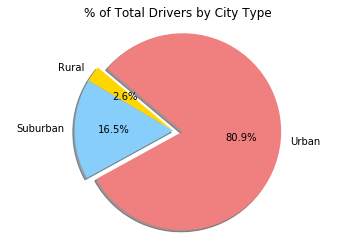

In [13]:
# Assign Type sums
rural_rides = gp_type_drivers.loc['Rural', 'driver_count']
suburban_rides = gp_type_drivers.loc['Suburban', 'driver_count']
urban_rides = gp_type_drivers.loc['Urban', 'driver_count']

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural_rides, suburban_rides, urban_rides]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, labels=labels, explode= explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("% of Total Drivers by City Type")


# Save Figure
plt.savefig("../Images/myPyberDrivers.png")

In [14]:
# Show Figure
plt.show()